# Data Science: Este repositorio contiene las tareas basicas en el analisis de datos.
# Ejemplo: Analisis de la pandemia ocasionada por el Covid-19.

Lao-Tse: La naturaleza ve a todos como perros de paja. 
Analista de datos: El Analista ve los datos como perros de paja. (No se autoidentifica con la data ni espera ver sus sesgos reflejados en los resultados).



Lo primero es obtener la información de alguna fuente en especifico. En este caso vamos a trabajar con la data de la pandemia del coronavirus obtenida de (https://ourworldindata.org/coronavirus-data).
La información se encuentra en archio xlsx y en csv. En caso de tener un CSV, convertirlo a xlsx pues queda más facil trabajarlo en columnas. En macOS se puede trabajar con Numbers.

1.Convertir csv a xlsx en caso de ser necesario. Revisar si se mantiene el formato original. Tener cuidado con las cifras (separadas por , o .).

2.Comprender la data con la que se trabaja.

Esta data tiene informacion dia a dia (2020-02-24 hasta 2021-04-29) ==>  y => (f(t), variables independientes)

*Las columnas que se encuentran en la data son: iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index

3.¿Que es lo que se quiere obtener de esta información?¿Que necesito para obtener esta información?¿Necesito todas las columnas? ¡¡Pensar antes de actuar!! ---- De lo general a lo particular.

a) Esperanza de vida por pais. Esperanza de vida (promedio mundial).
b) ¿Relacion entre esperanza de vida y muertes por covid.?¿Como podermos hacer eso?

c) Grafica de infectados por Covid vs Grafica de muertes ocasionadas  por covid. 

d)Relación entre el tiempo y picos de Covid











Importamos las librerias que vamos a utilizar

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


Subimos el archivo o archivos que vamos a utilizar en el analisis 

In [24]:
path = "/Users/andresh/Desktop/covid-data/covid-data.xlsx"
data=pd.read_excel(path)
df = pd.read_excel(path)
df_otheruse = pd.read_excel(path)
df.head()             

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


3.a ) Esperanza de vida por pais --> Limpiamos nuestra data de "ruido". 

1. Solo quedan las columnas "location" y "life_expectancy"
2. Eliminamos los duplicados y automaticamente nos deja un solo valor de los muchos repetidos
3. Eliminamos los valores NaN
4. Eliminamos la fila "World" que contiene la esperanza de vida promedio del mundo (Lo verificaremos para nuestro 3.b)

Para no complicarnos con que paises se consideran o no paises; tomamos en cuenta que en las olimpiadas compiten personas de 206 paises que son reconocidos por el comite olimpico). En nuestro ejercicio, ¡obtenemos una lista de 206 paises!

In [25]:
life_expectance = df[["location", "life_expectancy"]]
life_expectance = life_expectance.drop_duplicates()
df = life_expectance[life_expectance['life_expectancy'].notna()]
index_names = df[ df['location'] == 'World' ].index
df.drop(index_names, inplace = True)

/Users/andresh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
df_2 = df_otheruse[["location","date", "life_expectancy","total_deaths_per_million"]]
df_2

,location,date,life_expectancy,total_deaths_per_million
0,Afghanistan,2020-02-24,64.83,NaN
1,Afghanistan,2020-02-25,64.83,NaN
2,Afghanistan,2020-02-26,64.83,NaN
3,Afghanistan,2020-02-27,64.83,NaN
4,Afghanistan,2020-02-28,64.83,NaN
...,...,...,...,...
84958,Zimbabwe,2021-04-25,61.49,104.757
84959,Zimbabwe,2021-04-26,61.49,104.959
84960,Zimbabwe,2021-04-27,61.49,105.296
84961,Zimbabwe,2021-04-28,61.49,105.296


In [64]:
df_lowerthan73= df_2[(df_otheruse.life_expectancy < 73.28) & (df_otheruse.date == '2021-04-29')]
df_lowerthan73


,location,date,life_expectancy,total_deaths_per_million
430,Afghanistan,2021-04-29,64.83,67.252
2562,Angola,2021-04-29,61.15,18.073
5774,Azerbaijan,2021-04-29,73.00,442.837
7038,Bangladesh,2021-04-29,72.59,69.179
9138,Benin,2021-04-29,61.77,8.166
...,...,...,...,...
82836,Venezuela,2021-04-29,72.06,74.448
83763,World,2021-04-29,72.58,406.125
84148,Yemen,2021-04-29,66.12,40.971
84556,Zambia,2021-04-29,63.89,67.994


In [66]:
df_lowerthan73=df_lowerthan73[["location","total_deaths_per_million"]]
df_lowerthan73
df_lowerthan73.shape[0]


86

<BarContainer object of 86 artists>

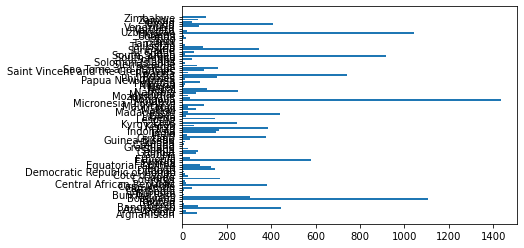

In [59]:
x1=df_lowerthan73['location'] 
y1=df_lowerthan73['total_deaths_per_million']
plt.barh(x1,y1)

In [67]:
df_higherthan73= df_2[(df_2.life_expectancy >= 73.28) & (df_otheruse.date == '2021-04-29')]
df_higherthan73 = df_higherthan73[["location","total_deaths_per_million"]]
df_higherthan73
df_higherthan73.shape[0]

110

<BarContainer object of 110 artists>

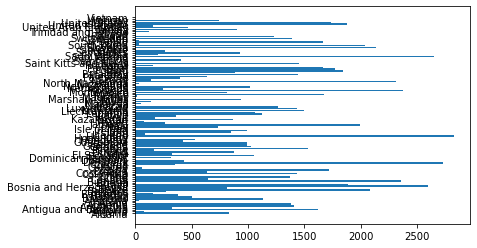

In [58]:
x1=df_higherthan73['location'] 
y1=df_higherthan73['total_deaths_per_million']
plt.barh(x1,y1)

¡¡¡¡¡¡Tener en cuenta que pueden haber paises con una fecha que no es exactamente igual a 2021-04-29 (aunque en su mayoria parece que si estan los datos actualizados para esta fecha). Sin embargo, se debe escribir una condicion en caso de que no sea igual a esta fecha, entonces elegir el ultimo valor que se tiene. !!! Se cuentan 196 paises en total ( hay 10 paises perdidos. ¿Se encontraran solucionando lo anterior?)

Vamos a hacer una grafica de barras para ver la esperanza de vida de los diferentes paises. Primero vamos a dividir ese DataFrame con 206 lineas en grupos más pequeños para que se puedan ver bien las graficas por pais.

In [4]:
df1 = df[0:20];df2 = df[21:41];df3 = df[41:61];df4 = df[61:81];df5 = df[81:101];df6 = df[101:121];df7 = df[121:141];df8 = df[141:161];
df9 = df[161:181];df10 = df[181:206]

x1=df1['location'] ; y1=df1['life_expectancy']; x2=df2['location']; y2=df2['life_expectancy']; x3=df3['location']; y3=df3['life_expectancy'];
x4=df4['location']; y4=df4['life_expectancy']; x5=df5['location']; y5=df5['life_expectancy']; x6=df6['location'];y6=df6['life_expectancy'];
x7=df7['location'];y7=df7['life_expectancy'];x8=df8['location'];y8=df8['life_expectancy'];x9=df9['location'];y9=df9['life_expectancy'];x10=df10['location'];y10=df10['life_expectancy']


Se hace un función para no tener que hacer el mismo proceso de plotear varias veces.

<BarContainer object of 25 artists>

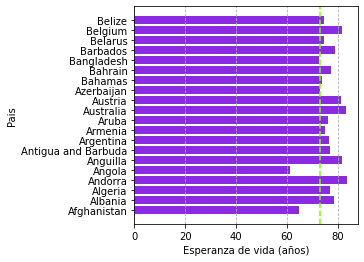

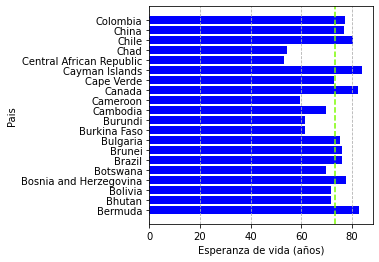

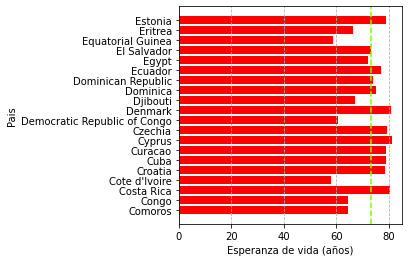

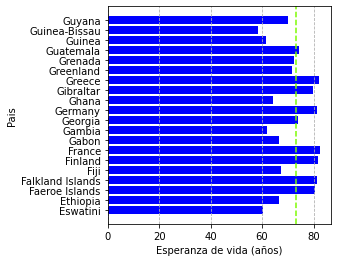

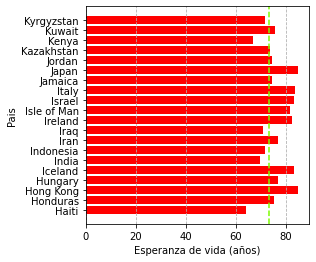

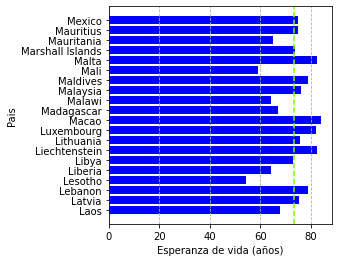

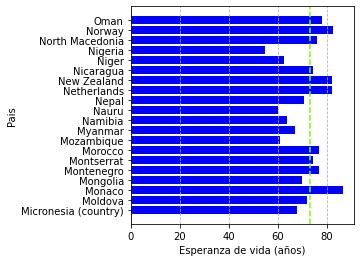

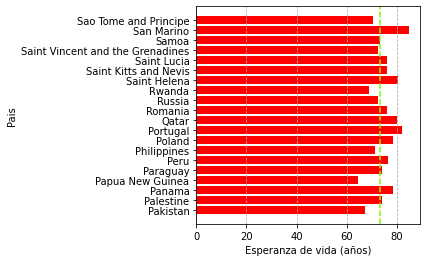

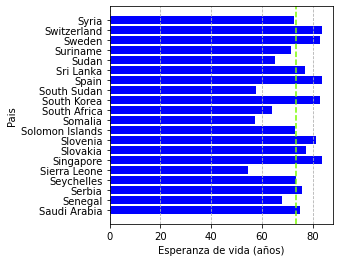

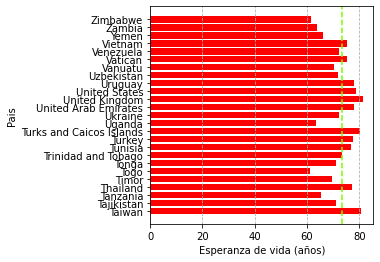

In [5]:
def plot_something(xvalue,yvalue,**kwargs):
    
    fig, ax = plt.subplots(figsize=(4,4))
    plt.grid(axis='x',linestyle='--')
    plt.xlabel('Esperanza de vida (años)')
    plt.ylabel('Pais')
    plt.axvline(x=73.28, color='lawngreen', linestyle='--')
   
    return plt.barh(xvalue,yvalue,**kwargs)

plot_something(x1,y1,color='blueviolet');plot_something(x2,y2,color='blue');plot_something(x3,y3,color='red');plot_something(x4,y4,color='blue');
plot_something(x5,y5,color='red');plot_something(x6,y6,color='blue');plot_something(x7,y7,color='blue');plot_something(x8,y8,color='red');
plot_something(x9,y9,color='blue');plot_something(x10,y10,color='red')

In [503]:
promedio = df["life_expectancy"].mean()
promedio = round(promedio,2)
print("La esperanza de vida promedio mundial es de:",promedio, "años")

La esperanza de vida promedio mundial es de: 73.28 años


# 3.a)  La esperanza de vida promedio mundial es: 73.28 años.

Este valor es muy cercano al valor que encontramos en el excel que estamos analizado.En las graficas de arriba se procede a colocar una linea de color amarillo para representar este valor. 

# 3.b) Ahora vamos a analizar si existe una relación entre la esperanza de vida y muertes por covid en cada pais.

Para esto vamos a dividir el DataFrame en dos grupos. Los que estan por debajo del promedio mundial y los que estan encima del promedio mundial. Luego analizamos la cantidad de muertos por millon de personas y observamos si hay una diferencia en estos dos grupos. ¿Estan correlacionados o no?

# 3.C) Muertes y casos mundiales a la fecha 2021-04-29

Para hacer esto sumamos el numero de muertos e infectados por cada dia desde que hay registros. Hay temas a considerar (cantidad de información para algunos paises)

In [648]:
cases = data[["location","date","total_deaths", "total_cases","life_expectancy",]]
cases = cases[cases['life_expectancy'].notna()]
index_names = cases[ cases['location'] == 'World'].index
cases.drop(index_names, inplace = True)
cases = cases.fillna(0)
result_cases = cases.drop_duplicates('location',keep='last')
total_cases = result_cases['total_cases'].sum()
total_deaths=result_cases['total_deaths'].sum()


Grafica pie para los casos y muertes mundialmente

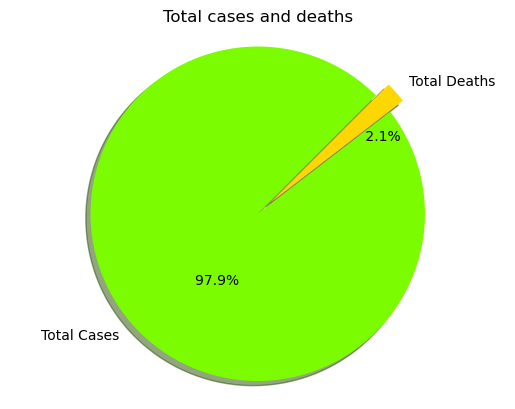

In [677]:
labels = 'Total Cases', 'Total Deaths'
sizes = [total_cases, total_deaths]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ["lawngreen", "gold" ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%20.1f%%',
        shadow=True, startangle=45,colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total cases and deaths")
plt.show()

# Continuara ... 